In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# Write an Interpretation of the Data 
# Here the count of the observation are 25
# The data is all about Student marks out of 100 based on their study hours.
# The mean of Hours is 5 and 

In [6]:
def getgrade(mark):
    if mark>=75:
        return "A"
    elif mark>=60 and mark<75:
        return "B"
    elif mark>=35 and mark<60:
        return "C"
    else:
        return "F"

In [7]:
df['Grades'] = df['Scores'].apply(getgrade)
df['Grades']

0     F
1     C
2     F
3     A
4     F
5     F
6     A
7     B
8     A
9     F
10    A
11    B
12    C
13    C
14    F
15    A
16    F
17    F
18    B
19    B
20    F
21    C
22    C
23    A
24    A
Name: Grades, dtype: object

In [8]:
df

,Hours,Scores,Grades
0,2.5,21,F
1,5.1,47,C
2,3.2,27,F
3,8.5,75,A
4,3.5,30,F
5,1.5,20,F
6,9.2,88,A
7,5.5,60,B
8,8.3,81,A
9,2.7,25,F


In [9]:
df['Grades'].value_counts("")

F    9
A    7
C    5
B    4
Name: Grades, dtype: int64

Text(0, 0.5, 'no. of Students')

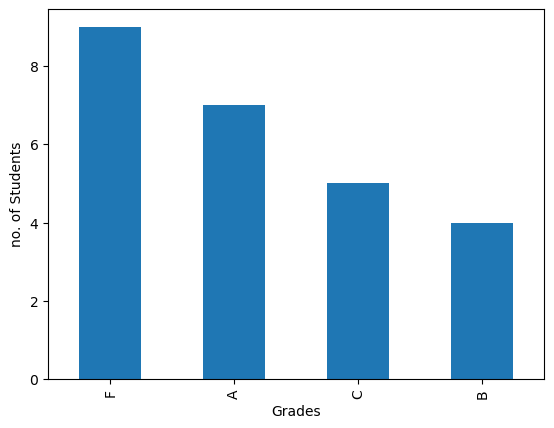

In [11]:
df["Grades"].value_counts().plot(kind="bar")
plt.xlabel('Grades')
plt.ylabel('no. of Students')

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

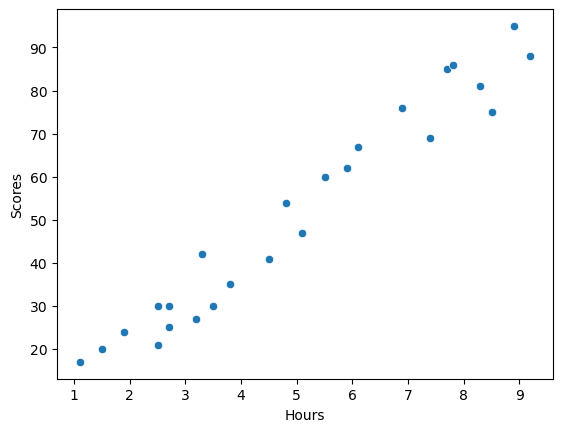

In [12]:
sns.scatterplot(data = df,x = df['Hours'],y = df['Scores'])

<AxesSubplot:ylabel='Grades'>

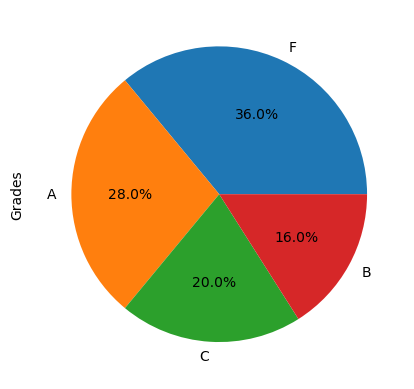

In [14]:
df["Grades"].value_counts().plot(kind="pie",autopct="%1.1f%%")

In [15]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [16]:
df.head()

,Hours,Scores,Grades
0,2.5,21,F
1,5.1,47,C
2,3.2,27,F
3,8.5,75,A
4,3.5,30,F


## Split the Dataset X and Y.

In [17]:
x = df.iloc[:,:-2]  #2D
y = df.iloc[:,-2]   #1D

In [18]:
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [19]:
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,
                                             random_state=1)

## Model Evaluation

In [21]:
# step1:- Import the Model
from sklearn.linear_model import LinearRegression

# step2:- Object Creation
linreg = LinearRegression()

# step3:- Train the Model using Training Data ----> m and c
linreg.fit(xtrain,ytrain)

# step4:- Make Prediction
ypred = linreg.predict(xtest)

In [22]:
ypred

array([ 9.93952968, 32.84320126, 18.26813752, 86.97915227, 48.45934097,
       78.65054442, 61.99332873, 75.52731648])

In [24]:
25/100*30

7.5

In [25]:
# let check what the "m" value (slope/co-efficient/gradient)
linreg.coef_

array([10.41075981])

In [26]:
# lets cehck the "c" intercept value 
linreg.intercept_

-1.5123061161277889

## Model Performing on Training Data 

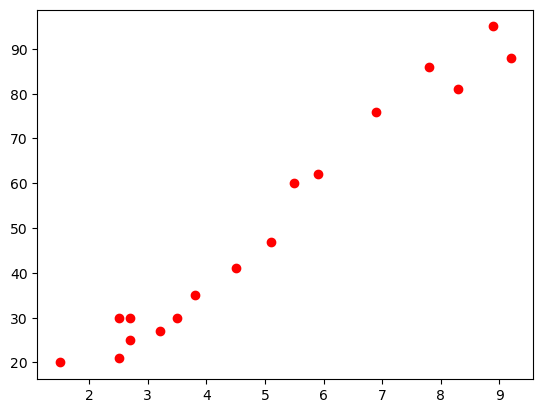

In [27]:
# Actual value of xtrain which is "ytrain"
plt.scatter(xtrain,ytrain,color="red")

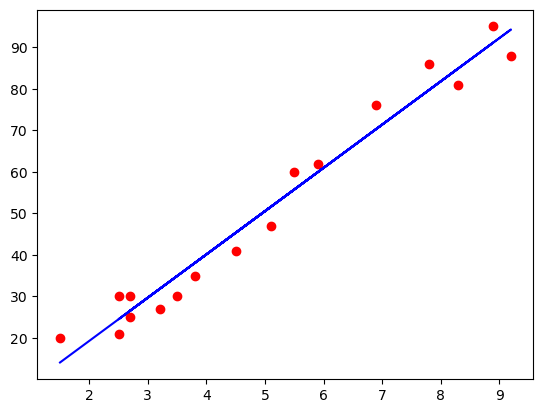

In [29]:
plt.scatter(xtrain,ytrain,color="red")
# priedicted value of xtrain 
plt.plot(xtrain,linreg.predict(xtrain), color="blue")

## Model performing on Testing Data

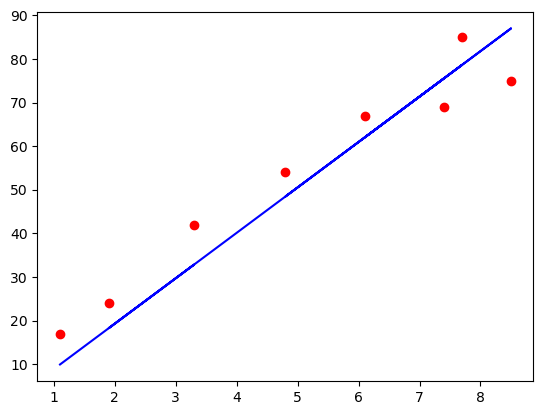

In [30]:
plt.scatter(xtest,ytest,color="red")
plt.plot(xtest,linreg.predict(xtest), color="blue")

## Regression Evaluation Metrics

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(ytest,ypred)

mse = mean_squared_error(ytest,ypred)

rmse = np.sqrt(mse)

r2 = r2_score(ytest,ypred)

print(f" MAE :- {mae}\n MSE:- {mse}\n RMSE:- {rmse}\n ACCURACY:- {r2}")

 MAE :- 7.169048271425507
 MSE:- 56.092330905646705
 RMSE:- 7.489481350911204
 ACCURACY:- 0.8933827573294114


## Model Testion on New Observation 

In [36]:
newob = 4.5

linreg.predict([[newob]])

array([45.33611303])

In [39]:
newob = 4.5

linreg.predict([[newob]])[0]

45.33611303042577

In [44]:
def makeprediction():
    newob = float(input("Enter no of Hours you study:- "))
    yp = linreg.predict([[newob]])[0]
    print(f"If you Study of {newob} hrs, You will Get Score Around {yp} Marks")
    return yp

In [45]:
makeprediction()

Enter no of Hours you study:- 15
If you Study of 15.0 hrs, You will Get Score Around 154.64909103905075 Marks


154.64909103905075